In [1]:
# ======= Python Part =========
# =============================

# Consider the general nonlinear process model

\begin{equation}
X_{i+1} = \alpha X_i(1-X_i), \quad i = 0,1,2
\end{equation}
# and the data model
\begin{equation}
Y_i = X_i + \epsilon_i
\end{equation}
where $\epsilon_i \sim {\cal{N}}(0,\tau)$

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

(a). Let us create histograms for the samples of Y1 and Y2 and discuss if they appear to be
normally distributed.

In [11]:
def process(x0,N): 
    x=np.zeros(N)
    x[0]=x0
    for i in range(N-1):
        x[i+1]=1.2*x[i]*(1-x[i])
    return x
x0=0.2
N=3
tau=0.002
X=process(x0,3)
X

array([0.2      , 0.192    , 0.1861632])

In [48]:
e1=np.random.normal(0,tau,2000) # e_i stand for epsilon
e2=np.random.normal(0,tau,2000)
Y1=np.zeros(2000)
Y2=np.zeros(2000)
for i in range(2000):
    Y1[i]=X[1]+e1[i]
    Y2[i]=X[2]+e2[i]

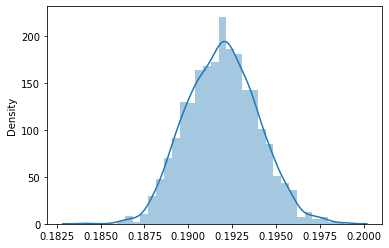

In [95]:
# plot(Y1);
sns.distplot(Y1)
plt.show()

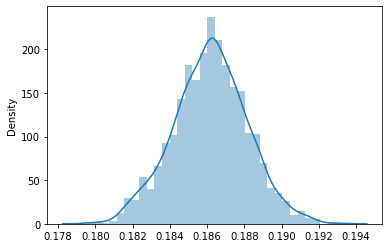

In [96]:
# plot(Y2);
sns.distplot(Y2)
plt.show()

(b). Mean and covariance

In [31]:
# For the mean of Y1
mean1 = Y1.mean()

In [32]:
# For the mean of Y2
mean2 = Y2.mean()

In [33]:
# The covariance 
Cov=np.cov(Y1,Y2)
Cov

array([[ 3.97368271e-06, -1.04390335e-08],
       [-1.04390335e-08,  4.01154503e-06]])

In [81]:
# Putting the means in a vector
M  = np.array([mean1,mean2])

(c). Assume that Y is normally distributed with the mean and covariance you found in 2b.
Identify the cost function J (x0; y1, y2) that the maximum likelihood estimate optimizes,
and evaluate it using the given value of $x_0$.

In [87]:
e1=np.random.normal(0,tau)
e2=np.random.normal(0,tau)
y1=X[1]+e1
y2=X[1]+e2
Y=np.array([y1,y2])
J=(Y-M)@np.linalg.inv(Cov)@(Y-M).T
print('The coast function is J = ', J)

The coast function is J =  7.292631934570365


(d). Use one of the 2000 samples and hold data y1, y2 fixed. Given these data vary $x_0$ between 0 and 1 and evaluate the cost function J ($x_0$; $y_1$, $y_2$). Plot J as a function of $x_0$ and choose enough values of $x_0$ so that you get a smooth looking curve.

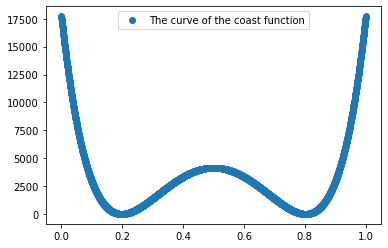

In [99]:
x0=np.linspace(0,1,2000)
J=np.zeros(len(x0))
y1=X[1]+e1
y2=X[2]+e2
Y=np.array([y1,y2])
for i in range(len(x0)):
    x1=process(x0[i],3)[1]
    x2=process(x0[i],3)[2]
    x=np.array([x1,x2])
    J[i]=(Y-x)@np.linalg.inv(Cov)@(Y-x).T
plt.plot(x0,J,'o');
plt.legend(['The curve of the coast function'])

In [92]:
x1_min=x0[np.argmin(J)]
print('The Minumum occurs at x1 =',x1_min)

The Minumum occurs at x1 = 0.19809904952476237


In [76]:
p=np.array([1.2,-1.2,x1_min])
print(np.roots(p))

[0.78708223 0.21291777]


There are two possible values for the re-analysis estimate , with 0.21291777 the most
plausible choice.